In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [2]:
ms = pdr.get_data_yahoo("MSFT")

In [3]:
ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,64.540001,64.050003,64.540001,64.230003,15871500.0,59.957729
2017-02-28,64.199997,63.759998,64.080002,63.980000,23239800.0,59.724350
2017-03-01,64.989998,64.019997,64.129997,64.940002,26937500.0,60.620502
2017-03-02,64.750000,63.880001,64.690002,64.010002,24539600.0,59.752361
2017-03-03,64.279999,63.619999,63.990002,64.250000,18135900.0,59.976398


In [5]:
ms.shape

(1260, 6)

In [6]:
type(ms)

pandas.core.frame.DataFrame

# ploting

<AxesSubplot:xlabel='Date'>

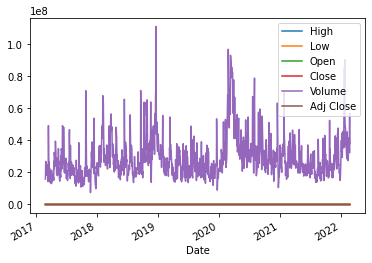

In [7]:
ms.plot()   #whole dataset

### particular column analysis

<AxesSubplot:xlabel='Date'>

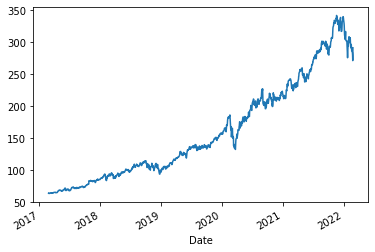

In [8]:
ms["Low"].plot()

<AxesSubplot:xlabel='Date'>

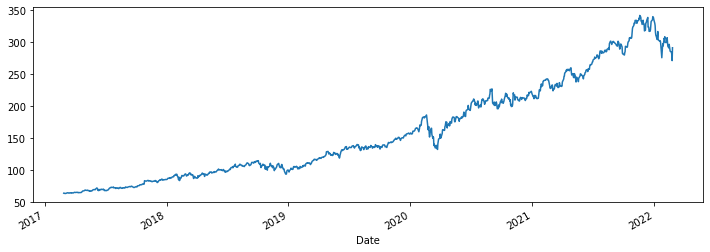

In [10]:
ms["Low"].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

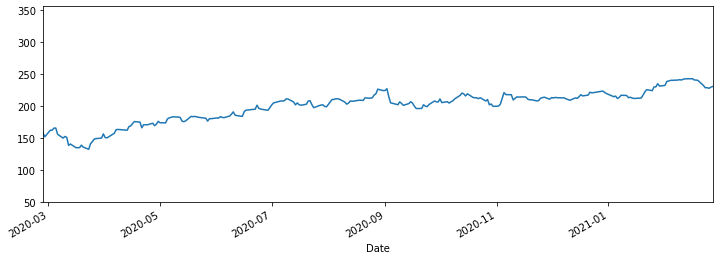

In [11]:
ms["Low"].plot(xlim=["2020-02-27","2021-02-27"],figsize=(12,4)) #xlimit

<AxesSubplot:xlabel='Date'>

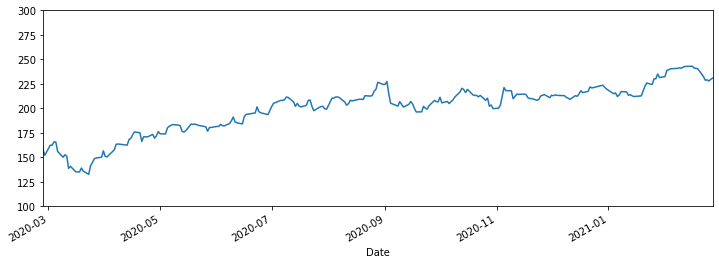

In [13]:
ms["Low"].plot(xlim=["2020-02-27","2021-02-27"],ylim=[100,300],figsize=(12,4))  #ylimit

<AxesSubplot:xlabel='Date'>

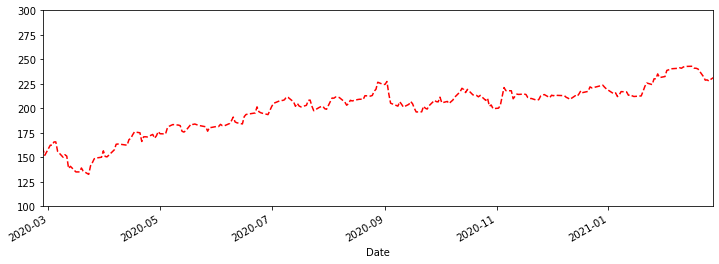

In [17]:
ms["Low"].plot(xlim=["2020-02-27","2021-02-27"],ylim=[100,300],figsize=(12,4),ls="--",c="red")  #color & linestyle

#### read specific index

In [18]:
ms.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2022-02-11', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)

In [19]:
index=ms.loc['2020-01-01':'2022-01-01'].index
share_open=ms.loc['2020-01-01':'2022-01-01']['Open']
share_open

Date
2020-01-02    158.779999
2020-01-03    158.320007
2020-01-06    157.080002
2020-01-07    159.320007
2020-01-08    158.929993
                 ...    
2021-12-27    335.459991
2021-12-28    343.149994
2021-12-29    341.299988
2021-12-30    341.910004
2021-12-31    338.510010
Name: Open, Length: 505, dtype: float64

In [20]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

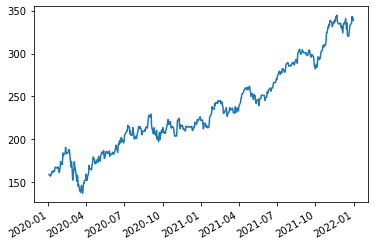

In [24]:
figure,axis=plt.subplots()
#plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

### Datetime Index

ms=ms.reset_index()

In [27]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1260 non-null   datetime64[ns]
 1   High       1260 non-null   float64       
 2   Low        1260 non-null   float64       
 3   Open       1260 non-null   float64       
 4   Close      1260 non-null   float64       
 5   Volume     1260 non-null   float64       
 6   Adj Close  1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


In [29]:
ms=ms.set_index('Date',drop=True)

In [30]:
ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,64.540001,64.050003,64.540001,64.230003,15871500.0,59.957729
2017-02-28,64.199997,63.759998,64.080002,63.980000,23239800.0,59.724350
2017-03-01,64.989998,64.019997,64.129997,64.940002,26937500.0,60.620502
2017-03-02,64.750000,63.880001,64.690002,64.010002,24539600.0,59.752361
2017-03-03,64.279999,63.619999,63.990002,64.250000,18135900.0,59.976398


### time resampling

In [31]:
ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,64.540001,64.050003,64.540001,64.230003,15871500.0,59.957729
2017-02-28,64.199997,63.759998,64.080002,63.980000,23239800.0,59.724350
2017-03-01,64.989998,64.019997,64.129997,64.940002,26937500.0,60.620502
2017-03-02,64.750000,63.880001,64.690002,64.010002,24539600.0,59.752361
2017-03-03,64.279999,63.619999,63.990002,64.250000,18135900.0,59.976398


In [33]:
ms.resample(rule='A').min()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,64.199997,63.619999,63.970001,63.980000,7425600.0,59.724350
2018-12-31,86.309998,83.830002,86.059998,85.010002,13677200.0,80.638588
2019-12-31,100.190002,97.199997,99.550003,97.400002,8989200.0,93.990852
2020-12-31,140.570007,132.520004,137.009995,135.419998,10550600.0,132.974579
2021-12-31,214.509995,211.940002,212.169998,212.250000,13900200.0,210.051315
2022-12-31,291.540009,271.519989,272.510010,280.269989,27379500.0,280.269989


In [32]:
ms.resample(rule='A').max()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,87.500000,86.230003,87.120003,86.849998,71066700.0,82.383949
2018-12-31,116.180000,114.930000,115.419998,115.610001,111242100.0,111.083603
2019-12-31,159.550003,158.220001,159.449997,158.960007,55636400.0,155.664322
2020-12-31,232.860001,227.350006,229.270004,231.649994,97012700.0,228.651718
2021-12-31,349.670013,342.200012,344.619995,343.109985,69870600.0,342.402008
2022-12-31,338.000000,329.779999,335.350006,334.750000,90428900.0,334.059265


<AxesSubplot:xlabel='Date'>

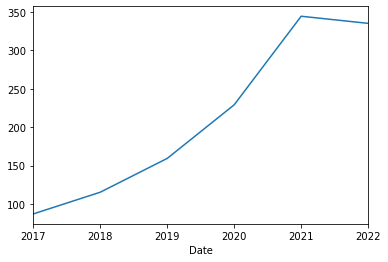

In [34]:
##year end frequency
ms.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

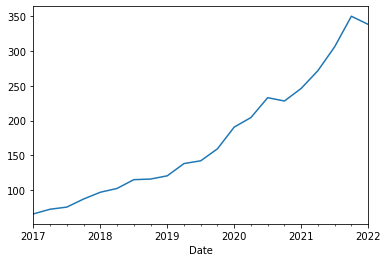

In [36]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b1ms.resample(rule='QS').max()['High'].plot()

ms.resample(rule='QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

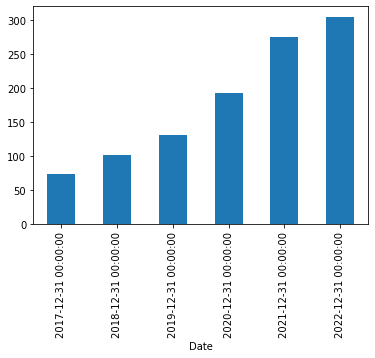

In [39]:
##plotting
ms['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

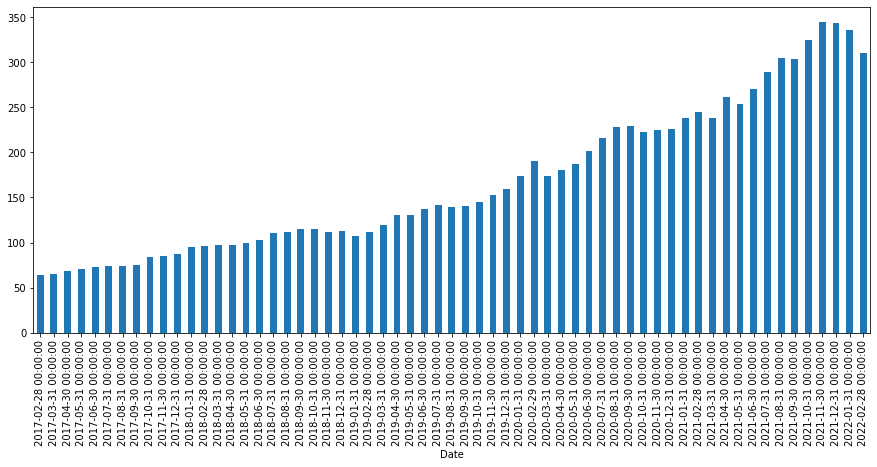

In [38]:
ms['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [37]:
ms['High'].rolling(11).max().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13    65.260002
2017-03-14    65.260002
2017-03-15    65.260002
2017-03-16    65.260002
2017-03-17    65.260002
2017-03-20    65.260002
2017-03-21    65.500000
2017-03-22    65.500000
2017-03-23    65.500000
2017-03-24    65.500000
Name: High, dtype: float64